In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data

In [3]:
df_org = pd.read_csv("Customer_Churn_Data.csv")

In [4]:
df_org.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
# Dropping unwanted variables

In [7]:
df=df_org.drop(["AccountID"],axis=1) 

In [8]:
# Check for missing value in any column

In [9]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [10]:
df.isnull().sum().sum()

2676

In [11]:
(df.isnull().sum()/len(df))*100

Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [12]:
# Check for duplicate data

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 259


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1347,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
1395,1,11,1.0,6.0,Debit Card,Male,3.0,4,HNI,3.0,Single,10,1.0,13,0,0,154,Mobile
1456,1,0,1.0,13.0,Debit Card,Male,3.0,5,Super,3.0,Single,2,1.0,24,1,6,161,Computer
1485,1,0,1.0,15.0,Credit Card,Female,2.0,3,Regular Plus,5.0,Single,8,0.0,22,1,4,142,Mobile
1498,0,18,1.0,15.0,Debit Card,Male,2.0,3,Super,4.0,Married,9,0.0,18,1,15,123,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,0,9,1.0,16.0,Credit Card,Male,3.0,4,Super,3.0,Single,3,0.0,20,1,9,176,Mobile
5604,1,20,1.0,14.0,Cash on Delivery,Male,4.0,4,Regular Plus,3.0,Married,10,0.0,12,7,9,148,Mobile
5605,0,15,1.0,35.0,Debit Card,Female,3.0,5,Super Plus,4.0,Married,2,0.0,24,2,11,261,Mobile
5611,0,12,3.0,17.0,Debit Card,Female,4.0,4,Super,1.0,Married,3,0.0,12,1,10,178,Mobile


In [14]:
##Drop Duplicate rows

In [15]:
df.drop_duplicates(inplace=True) 

In [16]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(11001, 18)


In [17]:
# Get the Summary Statistics

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11001,NaN,NaN,NaN,0.168348,0.374192,0,0,0,0,1
Tenure,10899,38,1,1322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,10889,NaN,NaN,NaN,1.65461,0.915916,1,1,1,3,3
CC_Contacted_LY,10899,NaN,NaN,NaN,17.8907,8.87029,4,11,16,23,132
Payment,10892,5,Debit Card,4484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10893,4,Male,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,10903,NaN,NaN,NaN,2.90085,0.725977,0,2,3,3,5
Account_user_count,10889,7,4,4454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,10904,7,Super,3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,10885,NaN,NaN,NaN,3.05788,1.3804,1,2,3,4,5


In [19]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [20]:
for column in df[['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CHURN :  2
1    1852
0    9149
Name: Churn, dtype: int64


TENURE :  38
60       2
51       2
61       2
50       2
31      95
25     112
29     112
#      116
26     121
27     130
99     131
28     133
30     136
24     144
22     148
21     164
23     166
20     211
17     212
18     247
19     267
16     283
15     303
14     338
2      345
12     349
13     349
6      358
11     376
4      393
5      394
3      399
10     412
7      432
9      485
8      510
0     1198
1     1322
Name: Tenure, dtype: int64


CITY_TIER :  3
2.0     456
3.0    3336
1.0    7097
Name: City_Tier, dtype: int64


CC_CONTACTED_LY :  44
126.0      1
4.0        1
127.0      1
132.0      1
129.0      1
43.0       8
5.0        8
41.0      29
42.0      30
40.0      46
39.0      55
38.0      73
37.0      96
36.0     145
33.0     151
31.0     160
35.0     161
26.0     164
27.0     168
30.0     170
28.0     172
34.0     174
29.0     177
32.0     188
25.0     193
24.0     208
23.0     235
22.0     277
6.0      305

In [21]:
## Handling Invalid data values such as ?,@,#

We will replace invalid data values with null values and treat the null values.

In [22]:
## Variable 'Tenure' has value # of count 116 
df.Tenure = df.Tenure.replace(to_replace = '#', value =np.nan)

In [23]:
## Variable 'Account_user_count' has value @ of count 332 
df.Account_user_count = df.Account_user_count.replace(to_replace = '@', value =np.nan)

In [24]:
## Variable 'rev_per_month' has value + of count 689 
df.rev_per_month = df.rev_per_month.replace(to_replace = '+', value =np.nan)

In [25]:
## Variable 'rev_growth_yoy' has value $ of count 3 
df.rev_growth_yoy = df.rev_growth_yoy.replace(to_replace = '$', value =np.nan)

In [26]:
## Variable 'coupon_used_for_payment' has value # of count 1 
## Variable 'coupon_used_for_payment' has value $ of count 1 
## Variable 'coupon_used_for_payment' has value * of count 1 
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '#', value =np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '$', value =np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace(to_replace = '*', value =np.nan)

In [27]:
## Variable 'Day_Since_CC_connect' has value $ of count 1 
df.Day_Since_CC_connect = df.Day_Since_CC_connect.replace(to_replace = '$', value =np.nan)

In [28]:
## Variable 'cashback' has value $ of count 2 
df.cashback = df.cashback.replace(to_replace = '$', value =np.nan)

Gender Female is available twice in different cases ('F', 'Female'). To avoid this being considered as 2 different, correct to single format.

Gender Male is available twice in different cases ('M', 'Male'). To avoid this being considered as 2 different, correct to single format

In [29]:
df['Gender']=df['Gender'].replace({'F':'Female','M':'Male'})

account_segment Regular Plus is available twice in different cases ('Regular +', 'Regular Plus'). To avoid this being considered as 2 different, correct to single format.

account_segment Super Plus is available twice in different cases ('Super +', 'Super Plus'). To avoid this being considered as 2 different, correct to single format

In [30]:
df['account_segment']=df['account_segment'].replace({'Regular +':'Regular Plus','Super +':'Super Plus'})

Login_device option &&&& is replaced with others. To avoid unnecessary confusion.

In [31]:
df['Login_device']=df['Login_device'].replace('&&&&','Others')

In [32]:
df['Churn'].value_counts(normalize = True)

0    0.831652
1    0.168348
Name: Churn, dtype: float64

In [33]:
# Convert data types

In [34]:
df_X = df.drop('Churn', axis = 1)

In [74]:
df_Y = df['Churn']

In [78]:
df_Y

0        1
1        1
2        1
3        1
4        1
        ..
11255    0
11256    0
11257    0
11258    0
11259    0
Name: Churn, Length: 11001, dtype: int64

In [35]:
df_X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [36]:
df_X['Tenure']=df_X['Tenure'].astype(float)
df_X['City_Tier']=df_X['City_Tier'].astype(str)
df_X['CC_Contacted_LY']=df_X['CC_Contacted_LY'].astype(str)
df_X['Service_Score']=df_X['Service_Score'].astype(str)
df_X['CC_Agent_Score']=df_X['CC_Agent_Score'].astype(str)
df_X['rev_per_month']=df_X['rev_per_month'].astype(float)
df_X['Complain_ly']=df_X['Complain_ly'].astype(str)
df_X['rev_growth_yoy']=df_X['rev_growth_yoy'].astype(float)
df_X['cashback']=df_X['cashback'].astype(float)

In [37]:
#### Let's check the number of outliers per column

<AxesSubplot:title={'center':'BOX PLOT'}>

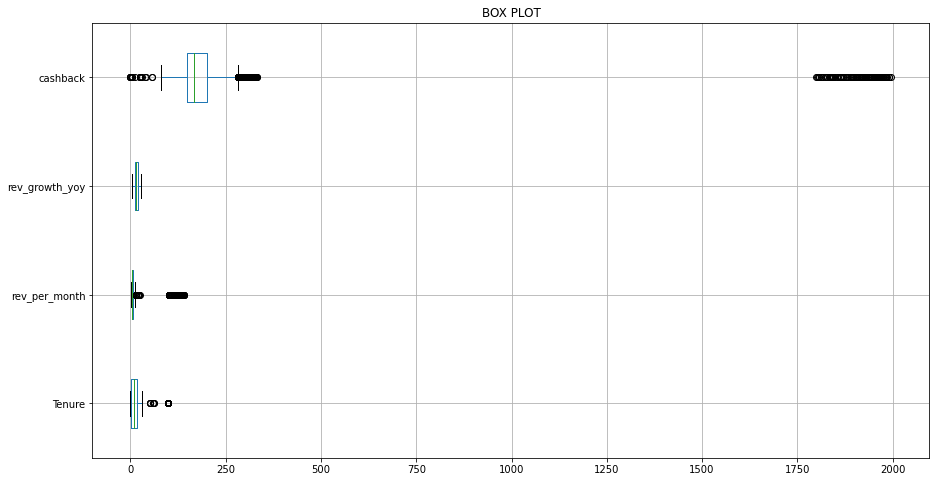

In [38]:
plt.figure(figsize=(15,8))
plt.title('BOX PLOT')
df_X[['Tenure','rev_per_month','rev_growth_yoy','cashback']].boxplot(vert=0)

Outlier treatment

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [40]:
lratio,uratio=remove_outlier(df_X['cashback'])
df_X['cashback']=np.where(df_X['cashback']>uratio,uratio,df_X['cashback'])
df_X['cashback']=np.where(df_X['cashback']<lratio,lratio,df_X['cashback'])

lraxis,uraxis=remove_outlier(df_X['rev_per_month'])
df_X['rev_per_month']=np.where(df_X['rev_per_month']>uraxis,uraxis,df_X['rev_per_month'])
df_X['rev_per_month']=np.where(df_X['rev_per_month']<lraxis,lraxis,df_X['rev_per_month'])

lra,ura=remove_outlier(df_X['Tenure'])
df_X['Tenure']=np.where(df_X['Tenure']>ura,ura,df_X['Tenure'])
df_X['Tenure']=np.where(df_X['Tenure']<lra,lra,df_X['Tenure'])

lrb,urb=remove_outlier(df_X['Tenure'])
df_X['rev_growth_yoy']=np.where(df_X['rev_growth_yoy']>urb,urb,df_X['rev_growth_yoy'])
df_X['rev_growth_yoy']=np.where(df_X['rev_growth_yoy']<lrb,lrb,df_X['rev_growth_yoy'])

<AxesSubplot:title={'center':'BOX PLOT'}>

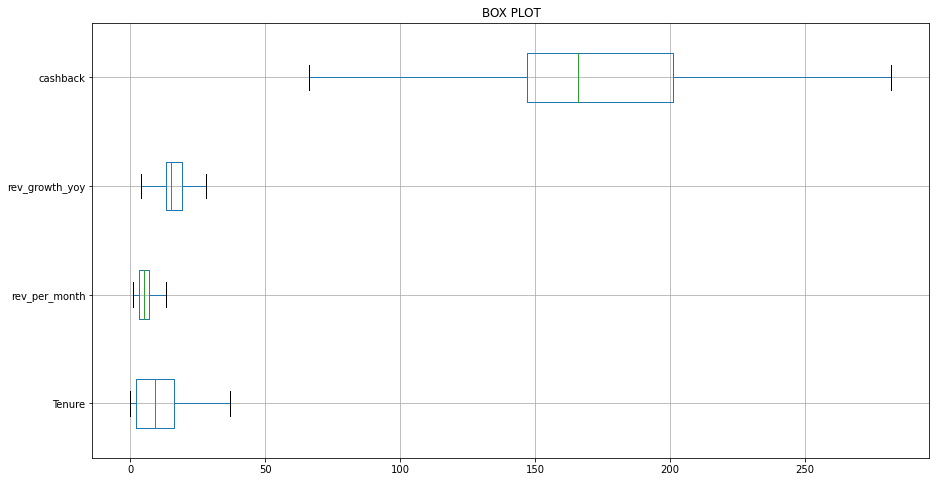

In [41]:
plt.figure(figsize=(15,8))
plt.title('BOX PLOT')
df_X[['Tenure','rev_per_month','rev_growth_yoy','cashback']].boxplot(vert=0)

In [42]:
#### Let's check the number of null values per column

In [43]:
df_X.isnull().sum()

Tenure                     218
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count         444
account_segment             97
CC_Agent_Score               0
Marital_Status             211
rev_per_month              791
Complain_ly                  0
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

Null value treatment for continous variables

In [44]:
df_X['Tenure'].fillna(df_X.Tenure.median(), inplace=True)
df_X['rev_per_month'].fillna(df_X.rev_per_month.median(), inplace=True)
df_X['rev_growth_yoy'].fillna(df_X.rev_growth_yoy.median(), inplace=True)
df_X['cashback'].fillna(df_X.cashback.median(), inplace=True)

In [45]:
df_X.isnull().sum()

Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count         444
account_segment             97
CC_Agent_Score               0
Marital_Status             211
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                     0
Login_device               221
dtype: int64

Null value treatment for categorical variables

In [46]:
df_X['City_Tier'].mode()
df_X['CC_Contacted_LY'].mode()
df_X['Service_Score'].mode()
df_X['CC_Agent_Score'].mode()
df_X['Complain_ly'].mode()
df_X['Login_device'].mode()

0    Mobile
dtype: object

In [88]:
df_X['City_Tier'].mode()

0    1.0
dtype: object

In [47]:
df_X['CC_Contacted_LY'].mode()

0    14.0
dtype: object

In [48]:
df_X['Service_Score'].mode()

0    3.0
dtype: object

In [49]:
df_X['CC_Agent_Score'].mode()

0    3.0
dtype: object

In [50]:
df_X['Complain_ly'].mode()

0    0.0
dtype: object

In [51]:
df_X['Login_device'].mode()

0    Mobile
dtype: object

In [53]:
df_X['Payment'].fillna('None', inplace=True)
df_X['Gender'].fillna('None', inplace=True)
df_X['Account_user_count'].fillna('None', inplace=True)
df_X['account_segment'].fillna('None', inplace=True)
df_X['Marital_Status'].fillna('None', inplace=True)
df_X['coupon_used_for_payment'].fillna('None', inplace=True)
df_X['Day_Since_CC_connect'].fillna('None', inplace=True)
df_X['Login_device'].fillna('None', inplace=True)

In [54]:
df_X['Payment']=df_X['Payment'].replace('None','Debit Card')
df_X['Gender']=df_X['Gender'].replace('None','Male')
df_X['Account_user_count']=df_X['Account_user_count'].replace('None','4')
df_X['account_segment']=df_X['account_segment'].replace('None','Super')
df_X['Marital_Status']=df_X['Marital_Status'].replace('None','Married')
df_X['coupon_used_for_payment']=df_X['coupon_used_for_payment'].replace('None','1')
df_X['Day_Since_CC_connect']=df_X['Day_Since_CC_connect'].replace('None','3')
df_X['Login_device']=df_X['Login_device'].replace('None','Mobile')


In [55]:
df_X.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [56]:
df_X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tenure,11001,NaN,NaN,NaN,10.2744,8.91056,0,2,9,16,37
City_Tier,11001,4,1.0,7097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Contacted_LY,11001,45,14.0,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment,11001,5,Debit Card,4593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11001,2,Male,6656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11001,7,3.0,5360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_user_count,11001,6,4,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11001,5,Super,4058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11001,6,3.0,3270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,11001,3,Married,5921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_X.to_csv('df_churn.csv')

In [58]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11001 non-null  float64
 1   City_Tier                11001 non-null  object 
 2   CC_Contacted_LY          11001 non-null  object 
 3   Payment                  11001 non-null  object 
 4   Gender                   11001 non-null  object 
 5   Service_Score            11001 non-null  object 
 6   Account_user_count       11001 non-null  object 
 7   account_segment          11001 non-null  object 
 8   CC_Agent_Score           11001 non-null  object 
 9   Marital_Status           11001 non-null  object 
 10  rev_per_month            11001 non-null  float64
 11  Complain_ly              11001 non-null  object 
 12  rev_growth_yoy           11001 non-null  float64
 13  coupon_used_for_payment  11001 non-null  object 
 14  Day_Since_CC_connect  

In [ ]:
# Label encoding the data 

In [64]:
df_sub=df_X.copy()

In [65]:
for feature in df_sub.columns: 
    if df_sub[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_sub[feature].unique()))
        print(pd.Categorical(df_sub[feature].unique()).codes)
        df_sub[feature] = pd.Categorical(df_sub[feature]).codes




feature: City_Tier
['3.0', '1.0', 'nan', '2.0']
Categories (4, object): ['1.0', '2.0', '3.0', 'nan']
[2 0 3 1]


feature: CC_Contacted_LY
['6.0', '8.0', '30.0', '15.0', '12.0', ..., '40.0', '41.0', '132.0', '43.0', '129.0']
Length: 45
Categories (45, object): ['10.0', '11.0', '12.0', '126.0', ..., '7.0', '8.0', '9.0', 'nan']
[40 42 24  9  2 16  1 43 25 12  6 14 23 22 20  8  0 19 21 11 17 27 13 29
 18 10 26 15 44 28 39 34  3 41 30  4 37 32 31 33 35 36  7 38  5]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: Service_Score
['3.0', '2.0', '1.0', 'nan', '0.0', '4.0', '5.0']
Categories (7, object): ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', 'nan']
[3 2 1 6 0 4 5]


feature: Account_user_count
['3', '4', '5', '2', '1', '6']
Categories (6, object): ['1'

In [66]:
df_sub.describe()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000,11001.000000
mean,10.274430,0.678484,18.267339,1.762749,0.605036,2.928461,2.705027,2.174802,2.088901,1.158531,5.268794,0.341424,16.206799,4.582493,11.704209,178.395509,0.782383
std,8.910558,0.941169,13.659565,1.004751,0.488865,0.779201,1.004165,1.124312,1.405607,0.660821,2.880470,0.538315,3.759624,4.759444,7.354933,45.511805,0.517953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,66.000000,0.000000
25%,2.000000,0.000000,8.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,13.000000,1.000000,4.000000,148.000000,0.000000
50%,9.000000,0.000000,14.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.000000,0.000000,15.000000,1.000000,12.000000,166.000000,1.000000
75%,16.000000,2.000000,28.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,7.000000,1.000000,19.000000,9.000000,19.000000,198.000000,1.000000
max,37.000000,3.000000,44.000000,4.000000,1.000000,6.000000,5.000000,4.000000,5.000000,2.000000,13.000000,2.000000,28.000000,16.000000,22.000000,282.000000,2.000000


In [ ]:
##Normalization and Scaling

In [67]:
from scipy.stats import zscore
df_new=df_sub.apply(zscore)
df_new.head(10)

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-0.704189,1.404185,1.591094,0.236140,-1.237690,0.091815,-0.702135,0.733991,-0.774719,1.273428,1.295405,1.223459,-1.384988,-0.752747,0.856035,-0.404210,0.420167
1,-1.153115,-0.720927,1.737518,2.226773,0.807957,0.091815,0.293763,-0.155482,-0.063250,1.273428,0.601043,1.223459,-0.321004,-0.962865,-1.591414,-1.261170,0.420167
2,-1.153115,-0.720927,0.419700,0.236140,0.807957,-1.191609,0.293763,-0.155482,-0.063250,1.273428,0.253861,1.223459,-0.587000,-0.962865,0.040219,-0.272370,0.420167
3,-1.153115,1.404185,-0.678481,0.236140,0.807957,-1.191609,0.293763,0.733991,1.359687,1.273428,0.948224,-0.634274,1.806965,-0.962865,0.040219,-0.975517,0.420167
4,-1.153115,-0.720927,-1.190966,-0.759177,0.807957,-1.191609,-0.702135,-0.155482,1.359687,1.273428,-0.787683,-0.634274,-1.384988,-0.752747,0.040219,-1.063410,0.420167
5,-1.153115,-0.720927,-0.165997,0.236140,-1.237690,0.091815,0.293763,-0.155482,1.359687,1.273428,-1.134864,1.223459,1.540969,1.348435,1.127973,-0.865650,-1.510599
6,-0.928652,1.404185,-1.264178,-1.754493,0.807957,-1.191609,-0.702135,0.733991,-0.774719,-1.753250,-0.440502,-0.634274,-0.587000,-0.962865,-1.591414,-1.261170,0.420167
7,-1.153115,-0.720927,1.591094,-0.759177,0.807957,0.091815,-0.702135,-0.155482,-0.774719,-1.753250,-0.787683,1.223459,-0.055008,0.928198,-1.591414,-1.217223,0.420167
8,0.305895,1.404185,1.810730,1.231457,0.807957,-1.191609,0.293763,-0.155482,-0.063250,-1.753250,-1.134864,1.223459,-0.587000,-0.962865,-0.095751,-1.129330,0.420167
9,-1.153115,-0.720927,0.492912,0.236140,0.807957,-1.191609,1.289661,-0.155482,-0.063250,1.273428,-1.134864,-0.634274,-1.118992,-0.752747,-1.455444,-1.217223,0.420167


In [ ]:
##Clustering

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
wardlink = linkage(df_new, method = 'ward')

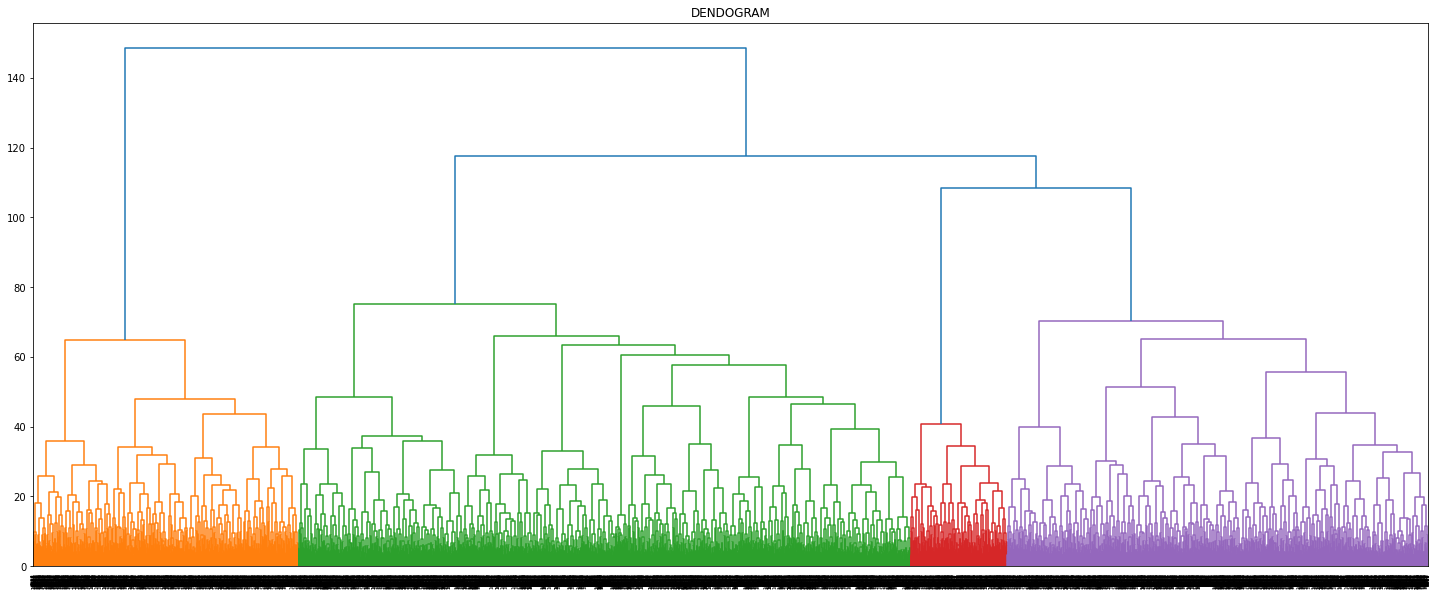

In [70]:
plt.figure(figsize = (25,10))
plt.title("DENDOGRAM")
dend = dendrogram(wardlink)

In [71]:
from scipy.cluster.hierarchy import fcluster

In [72]:
clusters = fcluster(wardlink, 90, criterion='distance')
clusters

array([4, 2, 2, ..., 2, 4, 2], dtype=int32)

In [82]:
df_X['Clusters']=clusters
df_X['Churn']=df_Y 

In [83]:
df_cap = pd.concat([df_X, df_Y], axis =1 )

In [84]:
df_X.to_csv('df_cap.csv')

In [85]:
df_X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clusters,Churn
0,4.0,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9.0,1.0,11.0,1,5,160.0,Mobile,4,1
1,0.0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7.0,1.0,15.0,0,0,121.0,Mobile,2,1
2,0.0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6.0,1.0,14.0,0,3,166.0,Mobile,2,1
3,0.0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8.0,0.0,23.0,0,3,134.0,Mobile,4,1
4,0.0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3.0,0.0,11.0,1,3,130.0,Mobile,2,1


In [ ]:
Univariate analysis

In [94]:
dk= pd.read_csv("df_cc.csv")

In [95]:
dk.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Clusters', 'Churn'],
      dtype='object')

In [101]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tenure                   11001 non-null  int64 
 1   City_Tier                11001 non-null  int64 
 2   CC_Contacted_LY          11001 non-null  int64 
 3   Payment                  11001 non-null  object
 4   Gender                   11001 non-null  object
 5   Service_Score            11001 non-null  int64 
 6   Account_user_count       11001 non-null  int64 
 7   account_segment          11001 non-null  object
 8   CC_Agent_Score           11001 non-null  int64 
 9   Marital_Status           11001 non-null  object
 10  rev_per_month            11001 non-null  int64 
 11  Complain_ly              11001 non-null  int64 
 12  rev_growth_yoy           11001 non-null  int64 
 13  coupon_used_for_payment  11001 non-null  int64 
 14  Day_Since_CC_connect     11001 non-nul

In [103]:
dk.skew()

Tenure                      0.817879
City_Tier                   0.751698
CC_Contacted_LY             1.447231
Service_Score              -0.000111
Account_user_count         -0.436360
CC_Agent_Score             19.021753
rev_per_month               0.807755
Complain_ly                 0.999426
rev_growth_yoy              0.751991
coupon_used_for_payment     2.551650
Day_Since_CC_connect        1.330951
cashback                    0.990195
Clusters                    0.288093
Churn                       1.772949
dtype: float64

Text(0.5, 1.0, 'variable-City_Tier')

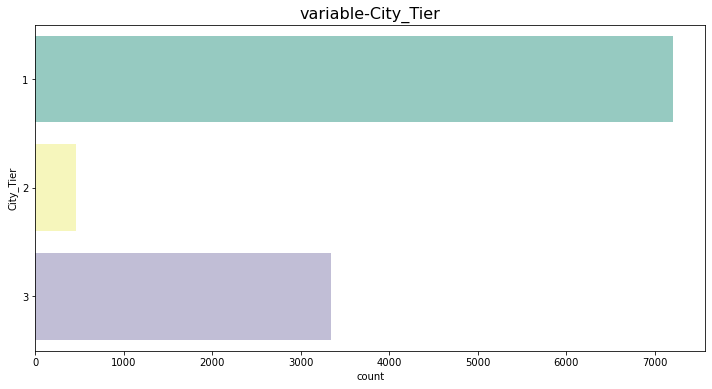

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.City_Tier),palette='Set3');
plt.title('variable-City_Tier',fontsize=16)

Text(0.5, 1.0, 'variable-CC_Contacted_LY')

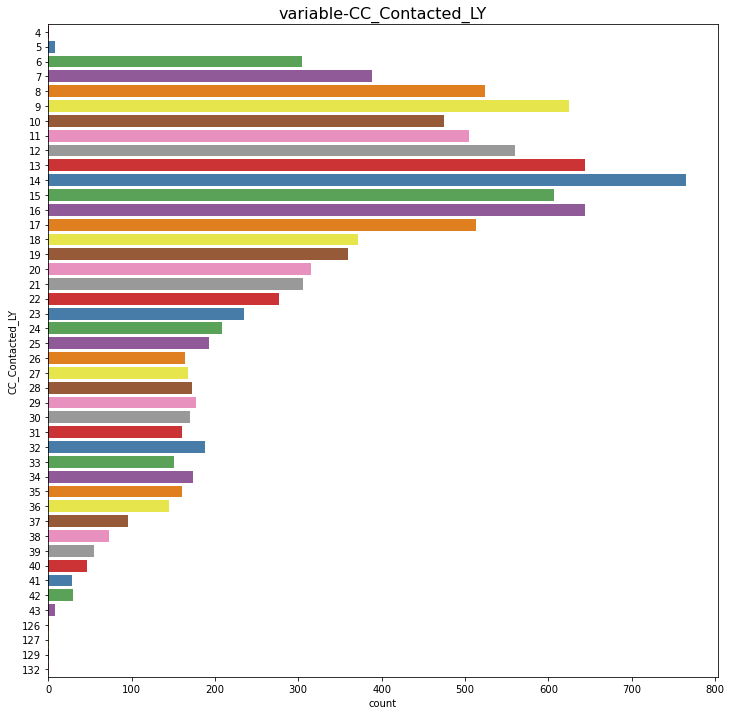

In [111]:
plt.figure(figsize=(12,12))
sns.countplot(y=(dk.CC_Contacted_LY),palette='Set1');
plt.title('variable-CC_Contacted_LY',fontsize=16)

Text(0.5, 1.0, 'variable-Payment')

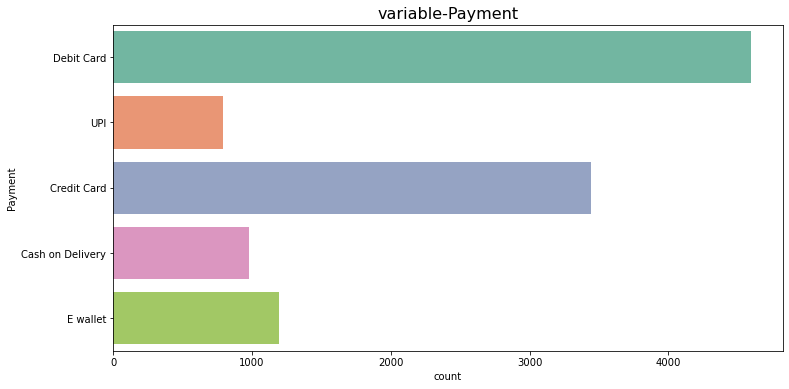

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Payment),palette='Set2');
plt.title('variable-Payment',fontsize=16)

Text(0.5, 1.0, 'variable-Gender')

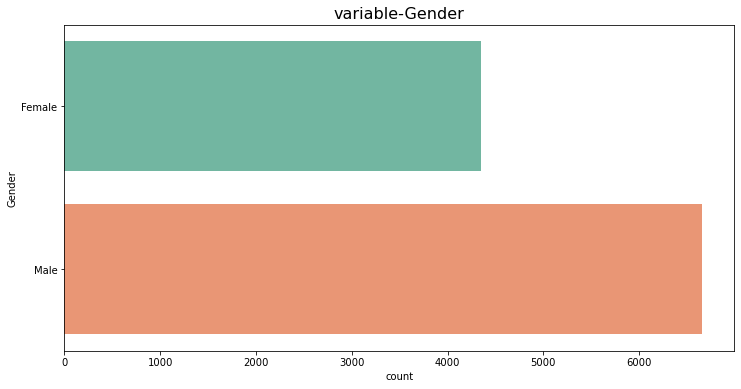

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Gender),palette='Set2');
plt.title('variable-Gender',fontsize=16)

Text(0.5, 1.0, 'variable-Login_device')

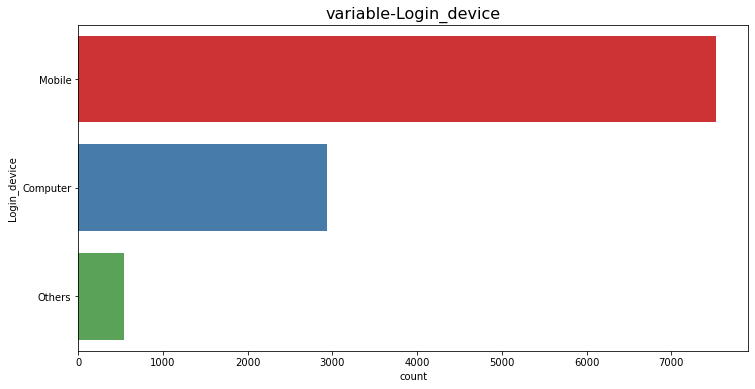

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Login_device),palette='Set1');
plt.title('variable-Login_device',fontsize=16)

Text(0.5, 1.0, 'variable-Service_Score')

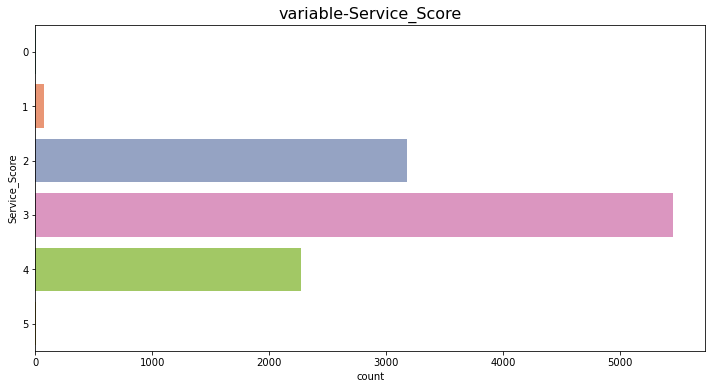

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Service_Score),palette='Set2');
plt.title('variable-Service_Score',fontsize=16)

Text(0.5, 1.0, 'variable-Day_Since_CC_connect')

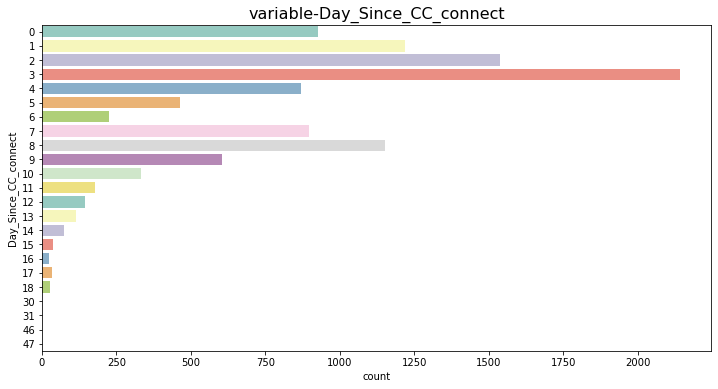

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Day_Since_CC_connect),palette='Set3');
plt.title('variable-Day_Since_CC_connect',fontsize=16)

Text(0.5, 1.0, 'variable-Clusters')

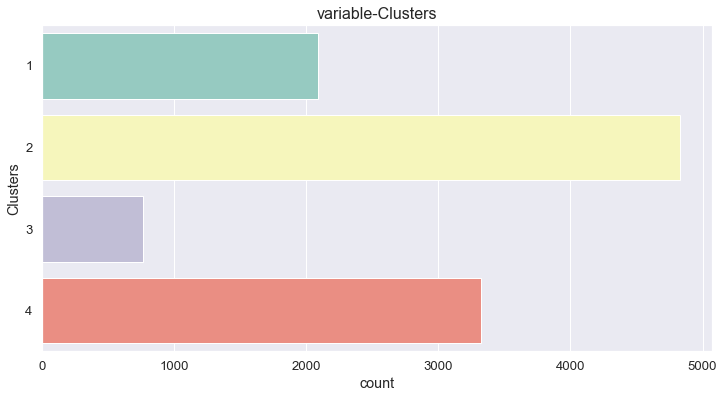

In [161]:
plt.figure(figsize=(12,6))
sns.countplot(y=(dk.Clusters),palette='Set3');
plt.title('variable-Clusters',fontsize=16)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\lib\site-pack

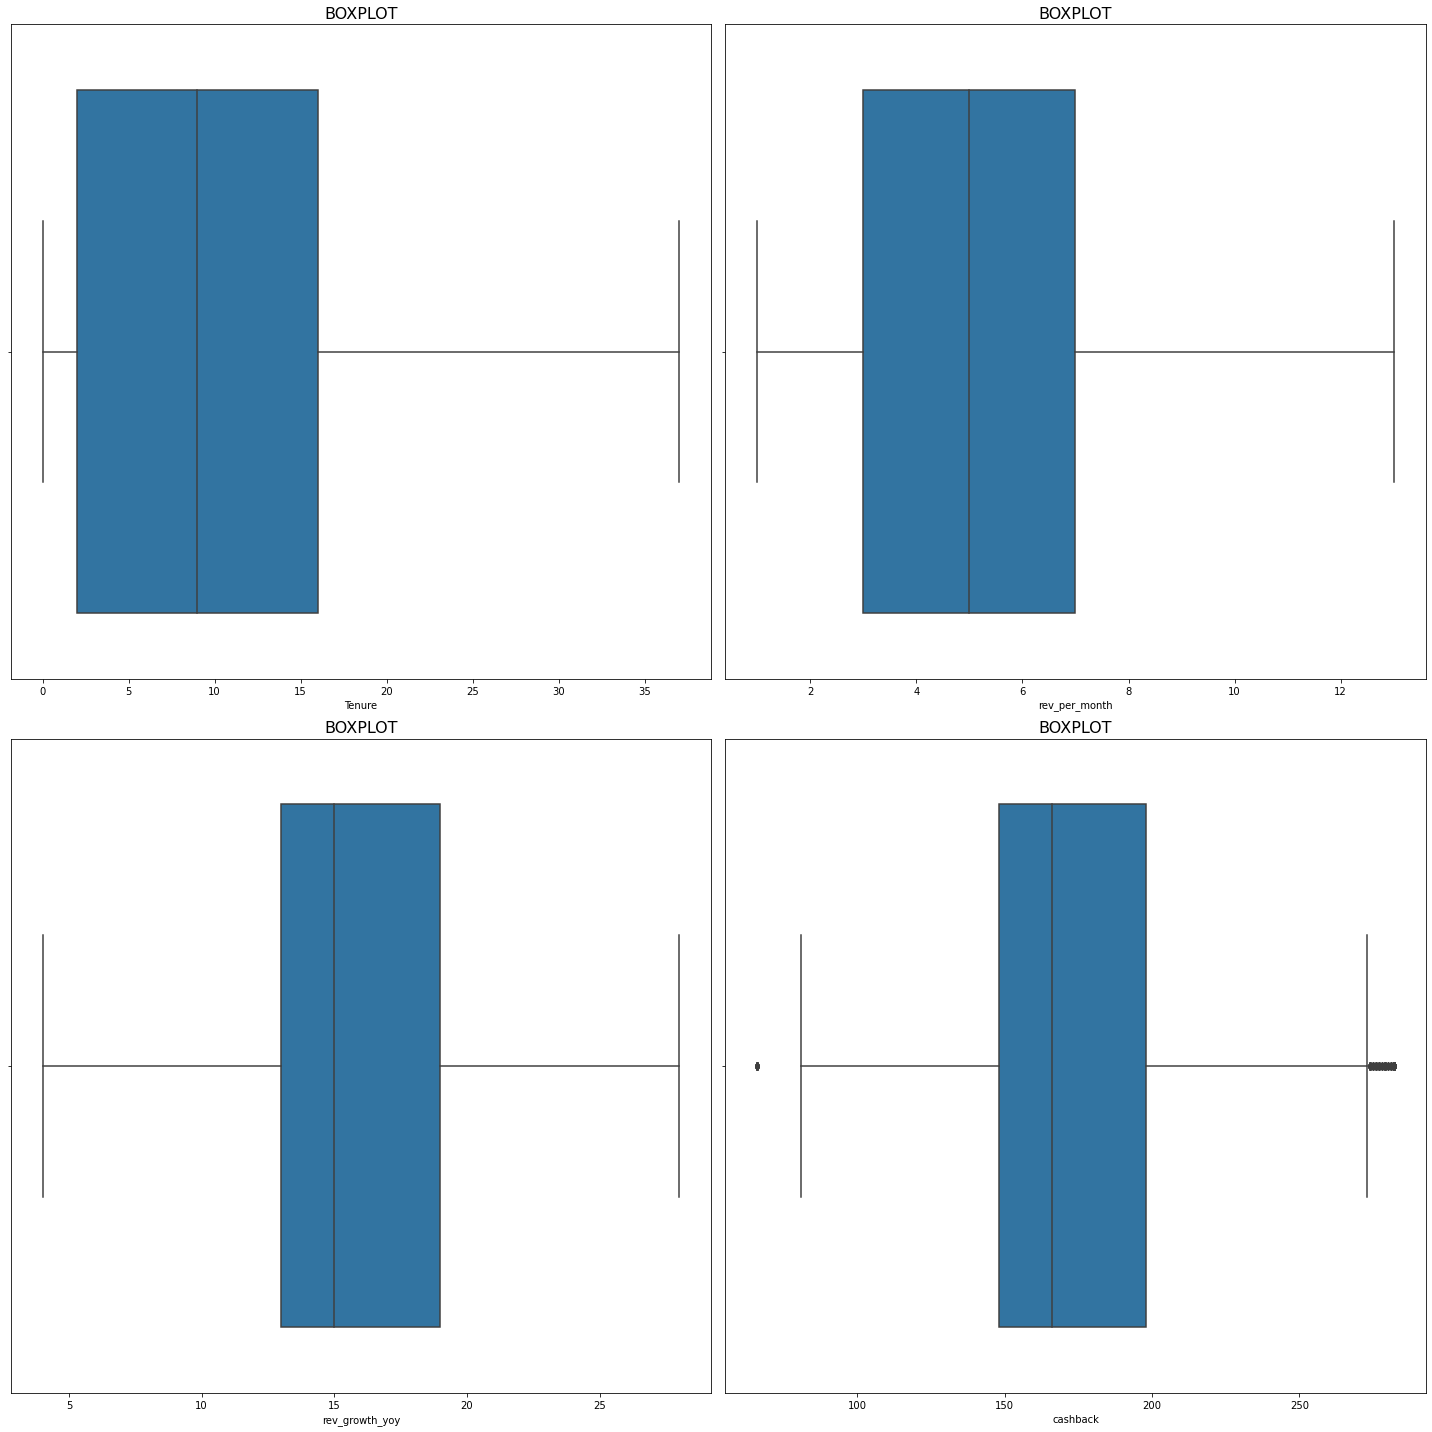

In [129]:
data_plot=df_X[['Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('BOXPLOT',fontsize=16)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

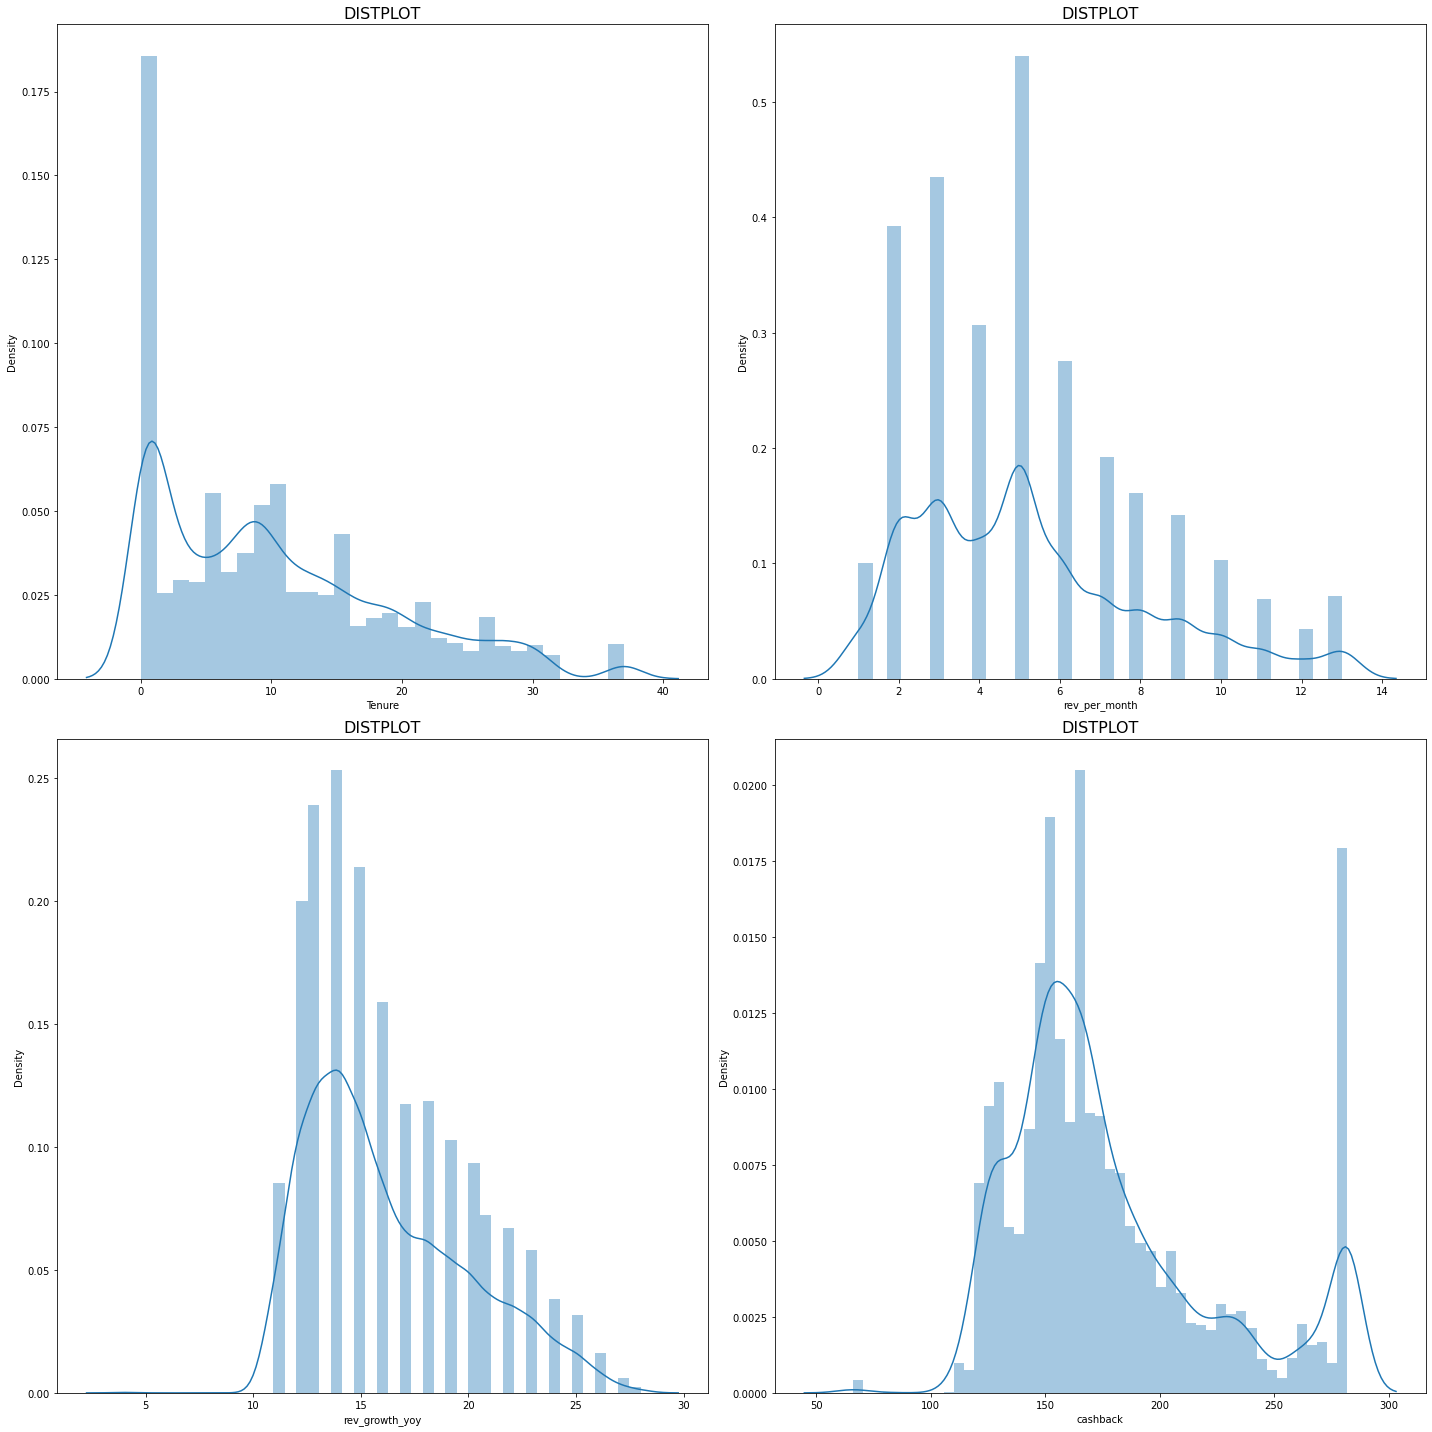

In [130]:
data_plot=df_X[['Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('DISTPLOT',fontsize=16)

In [132]:
dk.skew()

Tenure                      0.817879
City_Tier                   0.751698
CC_Contacted_LY             1.447231
Service_Score              -0.000111
Account_user_count         -0.436360
CC_Agent_Score             19.021753
rev_per_month               0.807755
Complain_ly                 0.999426
rev_growth_yoy              0.751991
coupon_used_for_payment     2.551650
Day_Since_CC_connect        1.330951
cashback                    0.990195
Clusters                    0.288093
Churn                       1.772949
dtype: float64

<Figure size 5760x1440 with 0 Axes>

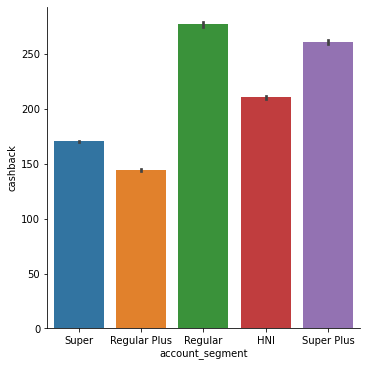

In [138]:
fig=plt.figure(figsize=(80,20))
sns.catplot(y='cashback', x='account_segment' , kind = 'bar', data = dk)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


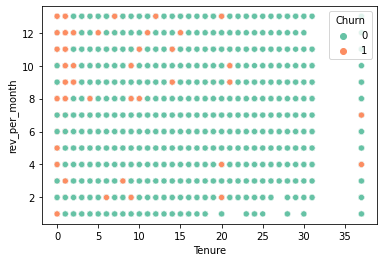

<Figure size 5760x1440 with 0 Axes>

In [134]:
sns.scatterplot(dk['Tenure'], dk['rev_per_month'], hue=dk['Churn'],palette='Set2') 
fig=plt.figure(figsize=(80,20))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


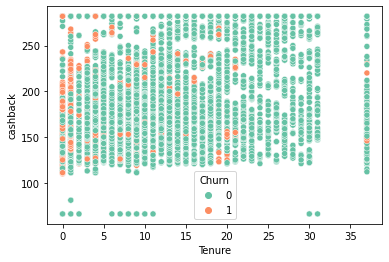

<Figure size 5760x1440 with 0 Axes>

In [137]:
sns.scatterplot(dk['Tenure'], dk['cashback'], hue=dk['Churn'],palette='Set2') 
fig=plt.figure(figsize=(80,20))

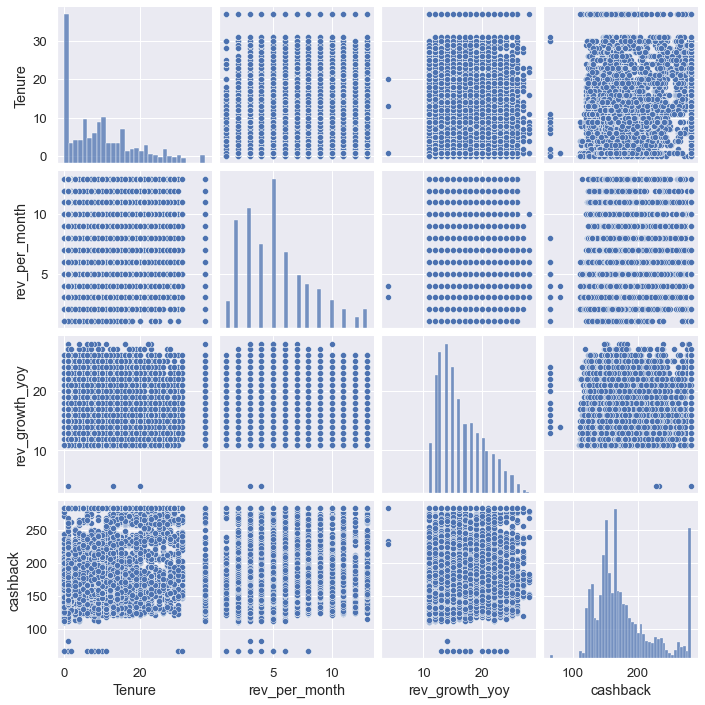

In [150]:
sns.pairplot(dk[['Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback']])

<AxesSubplot:>

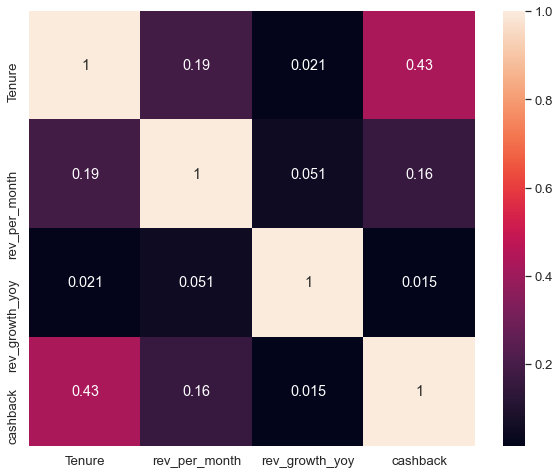

In [144]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(dk[['Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback']].corr(), annot=True)

<Figure size 2160x720 with 0 Axes>

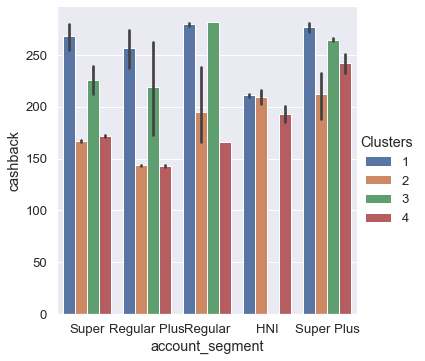

In [155]:
fig=plt.figure(figsize=(30,10))
sns.catplot(y='cashback', x='account_segment' , kind = 'bar',hue='Clusters', data = dk)

<AxesSubplot:xlabel='Clusters', ylabel='count'>

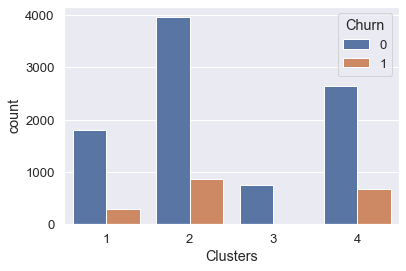

In [162]:
sns.countplot(x='Clusters',hue='Churn', data = dk)

<AxesSubplot:xlabel='Churn', ylabel='count'>

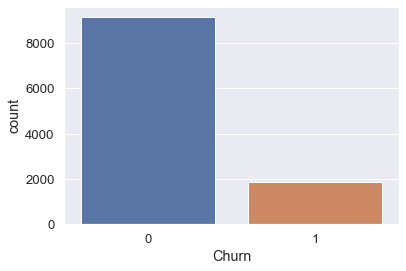

In [160]:
sns.countplot(x='Churn',data = dk)

In [165]:
clust1 = df_X[df_X['Clusters']==1]
clust1.describe()

,Tenure,rev_per_month,rev_growth_yoy,cashback,Clusters,Churn
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.0,2091.000000
mean,14.176949,5.576279,15.910091,228.395505,1.0,0.137733
std,8.576493,2.873621,3.672678,37.790242,0.0,0.344702
min,0.000000,1.000000,4.000000,131.000000,1.0,0.000000
25%,8.000000,3.000000,13.000000,202.000000,1.0,0.000000
50%,13.000000,5.000000,15.000000,222.000000,1.0,0.000000
75%,20.000000,7.000000,18.000000,282.000000,1.0,0.000000
max,37.000000,13.000000,27.000000,282.000000,1.0,1.000000


In [166]:
clust2 = df_X[df_X['Clusters']==2]
clust2.describe()

,Tenure,rev_per_month,rev_growth_yoy,cashback,Clusters,Churn
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.0,4828.000000
mean,8.710853,5.113297,16.374275,153.754143,2.0,0.179992
std,8.378828,2.873517,3.784507,23.201771,0.0,0.384220
min,0.000000,1.000000,11.000000,66.000000,2.0,0.000000
25%,1.000000,3.000000,13.000000,137.000000,2.0,0.000000
50%,7.000000,5.000000,15.000000,153.000000,2.0,0.000000
75%,13.000000,7.000000,19.000000,166.000000,2.0,0.000000
max,37.000000,13.000000,28.000000,282.000000,2.0,1.000000


In [167]:
clust3 = df_X[df_X['Clusters']==3]
clust3.describe()

,Tenure,rev_per_month,rev_growth_yoy,cashback,Clusters,Churn
count,762.000000,762.000000,762.000000,762.000000,762.0,762.000000
mean,20.583990,6.073491,16.464567,261.982940,3.0,0.019685
std,7.265124,2.840917,4.101463,26.268771,0.0,0.139007
min,0.000000,1.000000,11.000000,151.000000,3.0,0.000000
25%,16.000000,4.000000,13.000000,253.250000,3.0,0.000000
50%,21.000000,5.000000,15.000000,270.000000,3.0,0.000000
75%,26.000000,8.000000,19.000000,282.000000,3.0,0.000000
max,37.000000,13.000000,28.000000,282.000000,3.0,1.000000


In [168]:
clust4 = df_X[df_X['Clusters']==4]
clust4.describe()

,Tenure,rev_per_month,rev_growth_yoy,cashback,Clusters,Churn
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.0,3320.000000
mean,7.724096,5.116566,16.090964,163.553614,4.0,0.204819
std,7.652581,2.858830,3.679726,27.235033,0.0,0.403630
min,0.000000,1.000000,11.000000,66.000000,4.0,0.000000
25%,1.000000,3.000000,13.000000,147.000000,4.0,0.000000
50%,6.000000,5.000000,15.000000,162.000000,4.0,0.000000
75%,11.000000,7.000000,19.000000,177.000000,4.0,0.000000
max,37.000000,13.000000,28.000000,282.000000,4.0,1.000000


In [173]:
dt = dk[['Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback','Clusters']]

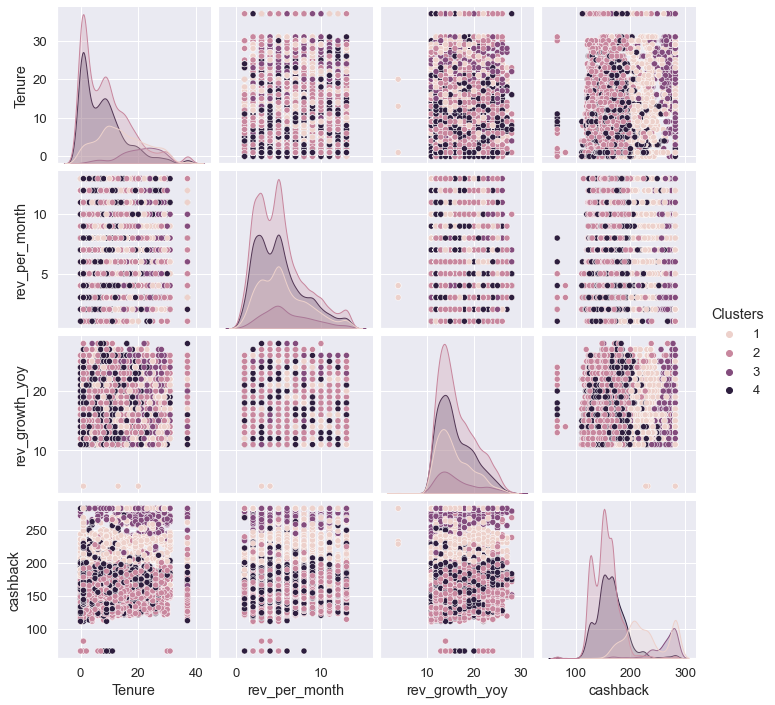

In [174]:
sns.pairplot(dt , hue = 'Clusters')
fig.set_size_inches(12, 7)

In [ ]:
dv = df_X

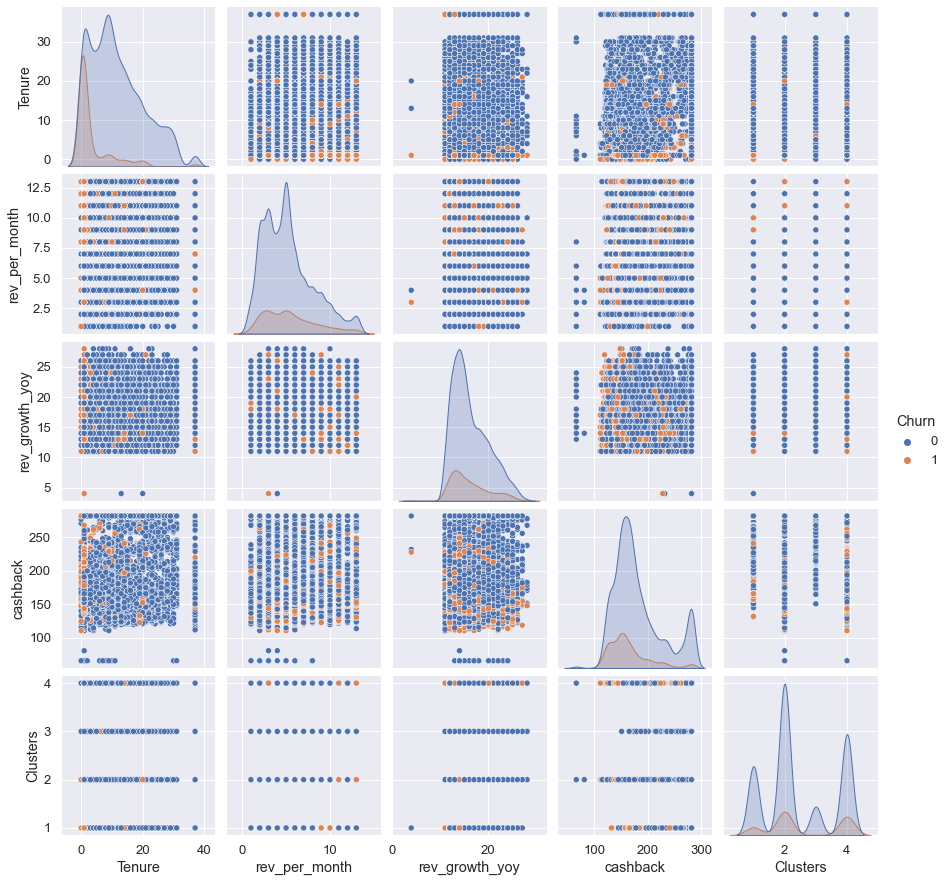

In [175]:
sns.pairplot(df_X , hue = 'Churn')
fig.set_size_inches(12, 7)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

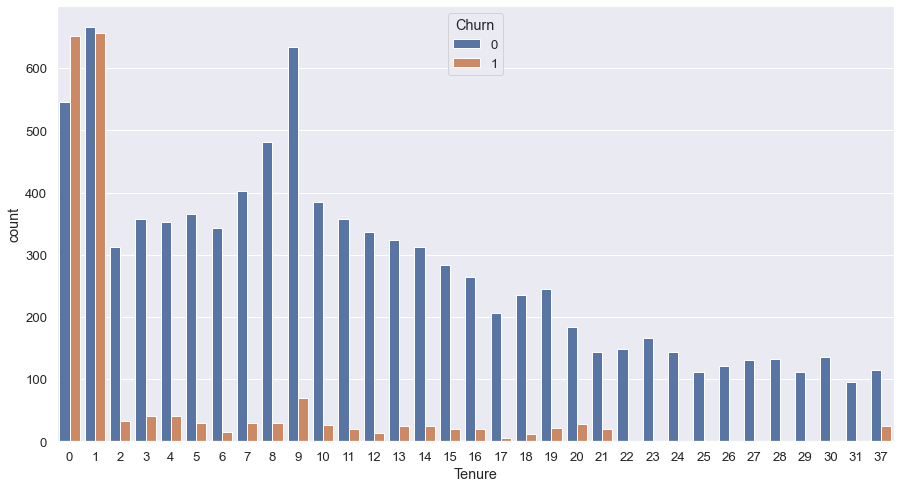

In [185]:
plt.figure(figsize=(15,8))
sns.countplot(x='Tenure',hue='Churn', data = dk)

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

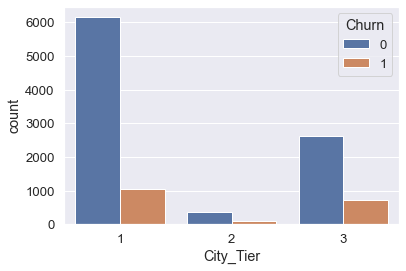

In [177]:
sns.countplot(x='City_Tier',hue='Churn', data = dk)

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='count'>

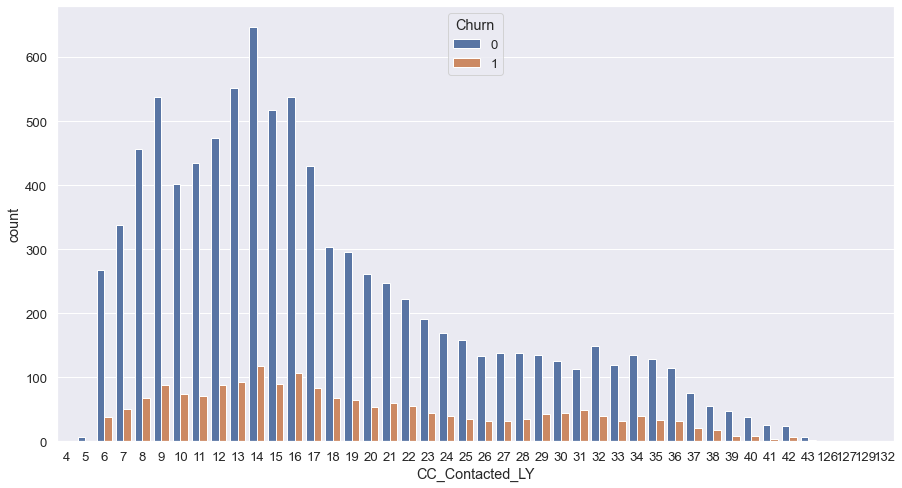

In [184]:
plt.figure(figsize=(15,8))
sns.countplot(x='CC_Contacted_LY',hue='Churn', data = dk)

<AxesSubplot:xlabel='Payment', ylabel='count'>

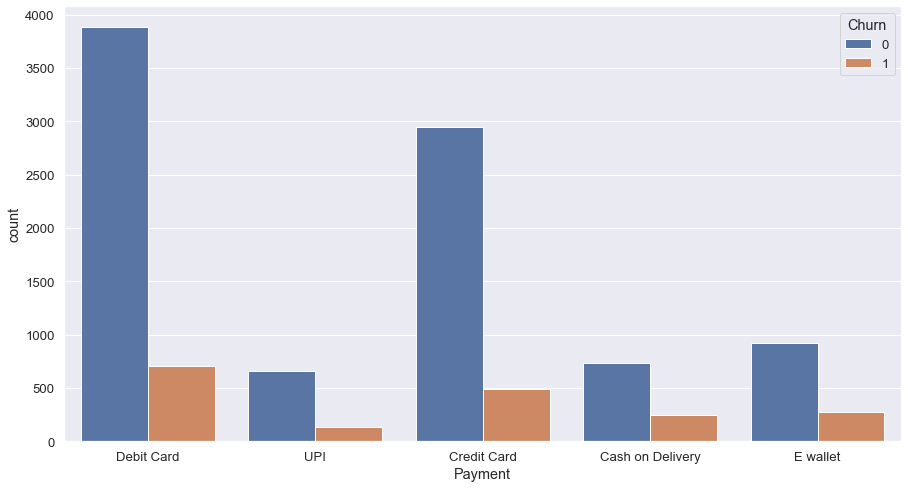

In [186]:
plt.figure(figsize=(15,8))
sns.countplot(x='Payment',hue='Churn', data = dk)

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

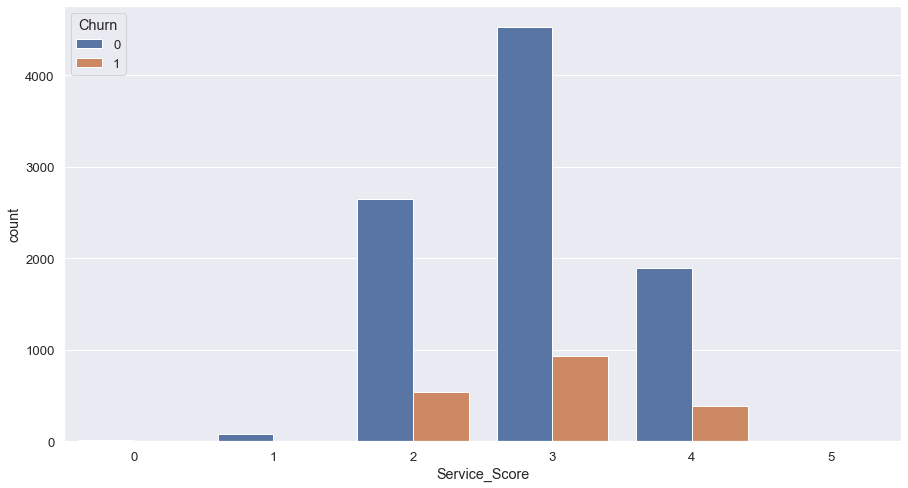

In [187]:
plt.figure(figsize=(15,8))
sns.countplot(x='Service_Score',hue='Churn', data = dk)

<AxesSubplot:xlabel='account_segment', ylabel='count'>

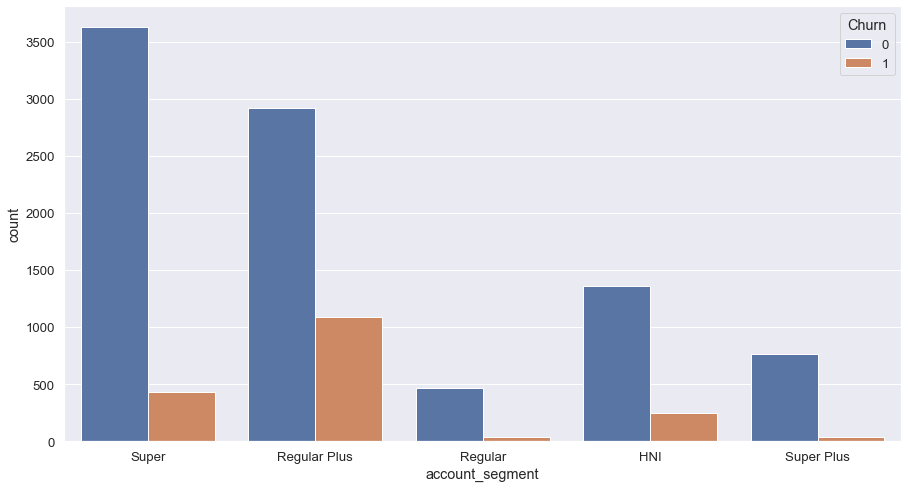

In [188]:
plt.figure(figsize=(15,8))
sns.countplot(x='account_segment',hue='Churn', data = dk)

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

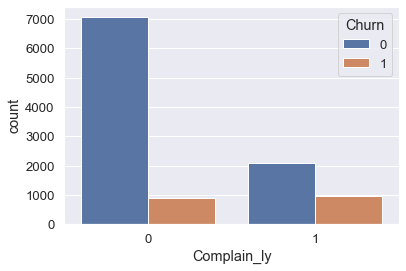

In [182]:
sns.countplot(x='Complain_ly',hue='Churn', data = dk)

<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='count'>

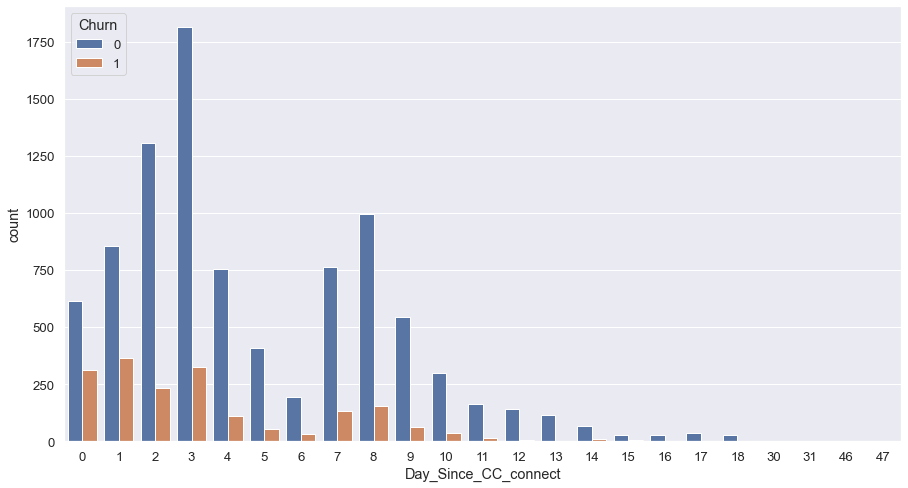

In [189]:
plt.figure(figsize=(15,8))
sns.countplot(x='Day_Since_CC_connect',hue='Churn', data = dk)